# 准备工作

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dogs = pd.read_csv('./dataset/dogs.csv')

In [3]:
dogs = dogs.set_index('breed')

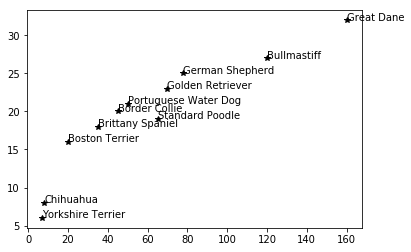

In [4]:
plt.plot(dogs['weight (pounds)'], dogs['height (inches)'], 'k*' )
for index in dogs.index:
    plt.annotate(index, xy = (dogs.loc[index]['weight (pounds)'], dogs.loc[index]['height (inches)']))

In [5]:
def normal(data):
    return (data - np.tile(data.median(),(data.shape[0], 1)))/np.tile(data.mad(),(data.shape[0], 1))

In [6]:
normal(dogs)

,height (inches),weight (pounds)
breed,,
Border Collie,0.000000,-0.141819
Boston Terrier,-0.715976,-0.850914
Brittany Spaniel,-0.357988,-0.425457
Bullmastiff,1.252959,1.985466
Chihuahua,-2.147929,-1.191280
German Shepherd,0.894970,0.794187
Golden Retriever,0.536982,0.567276
Great Dane,2.147929,3.120019
Portuguese Water Dog,0.178994,0.000000


In [7]:
def distance(vector1, vector2):
    return np.sqrt(np.sum(np.square(vector1 - np.tile(vector2, (vector1.shape[0],1))), axis=1))

In [8]:
distance(dogs,dogs.loc[['Yorkshire Terrier']])

breed
Border Collie            40.496913
Boston Terrier           16.401219
Brittany Spaniel         30.463092
Bullmastiff             114.934764
Chihuahua                 2.236068
German Shepherd          73.498299
Golden Retriever         65.253352
Great Dane              155.193428
Portuguese Water Dog     45.541190
Standard Poodle          59.439044
Yorkshire Terrier         0.000000
dtype: float64

In [9]:
def selectCenter(data, k=3):
    center = np.random.permutation(data.index)[0:k]# 第一个簇类
    return center

In [10]:
first_center = selectCenter(dogs)
centers = pd.DataFrame(dogs.loc[first_center].values,index=['class_'+str(i) for i in range(1, first_center.shape[0]+1)])

In [11]:
def updatecenter(data, centers):
    new_centers = centers.copy()
    dista = pd.DataFrame(index = data.index )
    for index, center in centers.iterrows():
        # 计算所有实例与聚类中心的距离
        dista[index]= distance(data.values,center.values)
    clas= {}#类别字典
    min_index = dista.idxmin(axis=1)#获取实例属于的类别
    for key in min_index.keys():
        # 将类别与实例的对应关系重新组织为字典
        clas.setdefault(min_index[key],[])
        clas[min_index[key]].append(key)
    # 重新计算聚类中心
    for key in clas:
        new_centers.loc[key] = (np.sum(data.loc[clas[key]], axis=0)/len(clas[key])).values# 更新聚类中心点
    return new_centers, clas

In [12]:
def kcluster(data, k=3):
    data = normal(data)
    init_center = selectCenter(data, k)
    old_centers =  pd.DataFrame(data.loc[init_center].values,index=['class_'+str(i) for i in range(1, init_center.shape[0]+1)])
    old_class = {}
    while True:
        new_center, new_clas = updatecenter(data, old_centers)  
        if new_clas == old_class:
            break
        old_centers = new_center
        old_class = new_clas.copy()
    print(old_class)

In [13]:
kcluster(dogs)

{'class_3': ['Border Collie', 'Boston Terrier', 'Brittany Spaniel', 'Chihuahua', 'Portuguese Water Dog', 'Standard Poodle', 'Yorkshire Terrier'], 'class_1': ['Bullmastiff', 'German Shepherd', 'Golden Retriever'], 'class_2': ['Great Dane']}
